## 1. Data Loading & Overview

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
pd.set_option("display.max_columns", None)


In [43]:
df = pd.read_csv("data/dataset.csv")
df.head()


,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,17-12-2024,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,01-06-2024,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,04-02-2025,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,28-10-2024,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,10-05-2024,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33


In [4]:

df.shape


(1000, 13)

**The dataset contains 1,000 records and 13 features related to customer purchases, 
including customer demographics, product details, pricing, and transaction metadata.**

In [5]:
df.columns


Index(['customer_id', 'order_date', 'product_id', 'category_id',
       'category_name', 'product_name', 'quantity', 'price', 'payment_method',
       'city', 'review_score', 'gender', 'age'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [7]:
df.describe()


,customer_id,product_id,category_id,quantity,price,review_score,age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,799.000000,1000.000000
mean,55490.723000,540.726000,30.030000,2.947000,251.850660,3.992491,46.382000
std,25910.185857,261.737704,14.370303,1.413573,139.194688,1.239469,16.569992
min,10201.000000,100.000000,10.000000,1.000000,10.720000,1.000000,18.000000
25%,33857.000000,311.750000,20.000000,2.000000,128.525000,3.000000,32.000000
50%,54619.500000,542.500000,30.000000,3.000000,250.220000,4.000000,47.000000
75%,77848.500000,770.750000,40.000000,4.000000,366.467500,5.000000,61.000000
max,99923.000000,995.000000,50.000000,5.000000,499.500000,5.000000,75.000000


In [8]:
# Observed some cancelled transactions with negative quantity
df.sample(5)


,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
29,86746,24-03-2024,768,30,Home & Living,Pillow,3,298.27,Credit Card,Mendezburgh,4.0,M,62
531,42991,24-08-2024,144,30,Home & Living,Vase,1,261.60,Cash on Delivery,Stevensfurt,2.0,F,44
722,77187,03-05-2024,500,20,Fashion,T-shirt,1,149.72,Credit Card,South Edgartown,5.0,M,40
643,21745,23-12-2024,560,40,Books & Stationery,Notebook,5,124.91,Credit Card,Schultzborough,5.0,NaN,54
126,86435,30-07-2024,988,40,Books & Stationery,Notebook,4,431.48,Bank Transfer,Christopherport,3.0,F,48


**The dataset contains 1,000 purchase records with information about customers, products, and transactions.
Most columns are complete, but review_score and gender have missing values.
The order_date column is currently stored as an object and will need conversion to datetime for time-based analysis.
The dataset appears suitable for analyzing customer behavior, product performance, and sales trends.**

## 2. Data Cleaning

In [9]:
df['order_date'] = pd.to_datetime(df['order_date'], format = "%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     1000 non-null   int64         
 1   order_date      1000 non-null   datetime64[ns]
 2   product_id      1000 non-null   int64         
 3   category_id     1000 non-null   int64         
 4   category_name   1000 non-null   object        
 5   product_name    1000 non-null   object        
 6   quantity        1000 non-null   int64         
 7   price           1000 non-null   float64       
 8   payment_method  1000 non-null   object        
 9   city            1000 non-null   object        
 10  review_score    799 non-null    float64       
 11  gender          897 non-null    object        
 12  age             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 101.7+ KB


In [10]:
df['order_date'].head()

0   2024-12-17
1   2024-06-01
2   2025-02-04
3   2024-10-28
4   2024-05-10
Name: order_date, dtype: datetime64[ns]

**Converted order_date to datetime using explicit day-first format**

In [11]:
df['review_score']=df['review_score'].fillna(df['review_score'].median())

In [12]:
df.isnull().sum()

customer_id         0
order_date          0
product_id          0
category_id         0
category_name       0
product_name        0
quantity            0
price               0
payment_method      0
city                0
review_score        0
gender            103
age                 0
dtype: int64

In [13]:
df['gender']=df['gender'].fillna("Unknown")

In [14]:
df.isnull().sum()

customer_id       0
order_date        0
product_id        0
category_id       0
category_name     0
product_name      0
quantity          0
price             0
payment_method    0
city              0
review_score      0
gender            0
age               0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df[['quantity', 'price', 'age', 'review_score']].describe()

,quantity,price,age,review_score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.947000,251.850660,46.382000,3.994000
std,1.413573,139.194688,16.569992,1.107787
min,1.000000,10.720000,18.000000,1.000000
25%,2.000000,128.525000,32.000000,4.000000
50%,3.000000,250.220000,47.000000,4.000000
75%,4.000000,366.467500,61.000000,5.000000
max,5.000000,499.500000,75.000000,5.000000


## Numerical Data Validation

- The numerical columns (quantity, price, age, and review_score) were validated using descriptive statistics.
- No negative or unrealistic values were observed.
- Quantities and prices fall within reasonable ranges for retail transactions, and customer ages are within an expected adult range.
- The dataset appears suitable for further exploratory analysis.

## Dataset cleaned:
- Converted order_date to datetime
- Filled missing review_score with median
- Filled missing gender with 'Unknown'
- No duplicates found

## 3. Exploratory Data Analysis

In [17]:
df['revenue']=df['quantity']*df['price']
df[['quantity', 'price', 'revenue']].head()
total_revenue= df['revenue'].sum()
total_revenue


737326.8800000001

**Insight:** 
The total revenue generated across all transactions in the dataset is approximately ₹737326.8  
This represents the overall sales volume captured in the data and provides a baseline for further analysis.


In [18]:
avg_order_value = df['revenue'].mean()
avg_order_value

737.3268800000001

**Insight:**  
The average order value (AOV) is approximately ₹737.33, indicating that customers spend around this amount per transaction on average.  
This metric helps assess customer purchasing behavior and can be used to evaluate the impact of pricing or promotional strategies.


In [19]:
category_revenue = ( df.groupby('category_name')['revenue'].sum()
                    .sort_values(ascending = False))
category_revenue

category_name
Electronics           166510.34
Sports & Outdoors     154346.26
Books & Stationery    143215.52
Home & Living         138540.15
Fashion               134714.61
Name: revenue, dtype: float64

**Insight:**  
The Electronics category generates the highest total revenue (₹166,510), indicating strong customer demand for electronic products.  
However, revenue across other categories is relatively evenly distributed, with no category showing a significantly lower contribution.  
This suggests that while Electronics leads in revenue, overall business performance is supported by a balanced demand across all product categories.


In [20]:
product_quantity = (
    df.groupby('product_name')['quantity']
      .sum()
      .sort_values(ascending=False)
)



product_revenue = (
    df.groupby('product_name')['revenue']
      .sum()
      .sort_values(ascending=False)
)

(product_revenue.head(10), product_quantity.head(10))



(product_name
 Smartphone     38319.26
 Notebook       38027.68
 Yoga Mat       37752.08
 Soccer Ball    37587.30
 Tablet         33581.02
 Vase           32191.58
 Laptop         32000.38
 Smartwatch     31820.10
 Headphones     30789.58
 T-shirt        30718.54
 Name: revenue, dtype: float64,
 product_name
 Smartphone       159
 Yoga Mat         149
 Soccer Ball      137
 T-shirt          135
 Laptop           134
 Eraser           131
 Notebook         131
 Running Shoes    131
 Vase             128
 Headphones       128
 Name: quantity, dtype: int64)

**Insight:**  
The Smartphone product ranks highest in both total quantity sold and total revenue, indicating strong demand combined with a relatively higher price point.  
However, the comparison shows that high sales volume does not always translate to high revenue, as some products (e.g., Eraser, Running Shoes) sell in large quantities but generate lower overall revenue.  
Conversely, certain products achieve high revenue with fewer units sold, suggesting premium pricing.  
This highlights the importance of distinguishing between high-volume products and high-value products when designing pricing and promotional strategies.


In [21]:
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '65+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)


# Grouped by observed age groups to avoid including empty categories
age_group_revenue = (
    df.groupby('age_group', observed=True)['revenue']
      .mean()
      .sort_values(ascending=False)
)

age_group_quantity = (
    df.groupby('age_group', observed=True)['quantity']
      .mean()
      .sort_values(ascending=False)
)

age_group_quantity,age_group_revenue



(age_group
 18–25    3.123967
 46–55    3.018182
 26–35    2.970760
 65+      2.915584
 56–65    2.888325
 36–45    2.827586
 Name: quantity, dtype: float64,
 age_group
 46–55    818.935212
 56–65    740.306954
 26–35    739.721053
 65+      728.504091
 18–25    715.180744
 36–45    683.341379
 Name: revenue, dtype: float64)

**Insight:**  
The analysis shows clear differences in purchasing behavior across age groups. Customers aged **18–25** purchase the highest number of items per order on average, but generate lower revenue per transaction, suggesting a preference for lower-priced products.  
In contrast, customers in the **46–55** and **56–65** age groups exhibit the highest average order values, indicating stronger purchasing power and a tendency toward higher-value products.  
This suggests that volume-based promotions may be more effective for younger customers, while premium or value-focused offerings may resonate better with middle-aged and older segments.


In [22]:
category_review = (
    df.groupby('category_name')['review_score']
      .mean()
      .sort_values(ascending=False)
)
category_review_count = (
    df.groupby('category_name')['review_score']
      .count()
      .sort_values(ascending=False)
)

category_review_count,category_review


(category_name
 Sports & Outdoors     211
 Electronics           207
 Fashion               198
 Books & Stationery    193
 Home & Living         191
 Name: review_score, dtype: int64,
 category_name
 Sports & Outdoors     4.071090
 Electronics           3.990338
 Books & Stationery    3.979275
 Fashion               3.974747
 Home & Living         3.947644
 Name: review_score, dtype: float64)

**Insight:**  
The analysis shows that the **Sports & Outdoors** category has the highest average review score (≈4.07), indicating slightly higher customer satisfaction compared to other categories.  
However, review scores across all categories are tightly clustered around 4.0, suggesting a generally consistent level of product quality and customer experience.  
No category exhibits significantly low ratings, implying that customer satisfaction is stable across the overall product portfolio.


In [23]:
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_revenue = (
    df.groupby('order_month')['revenue']
      .sum()
      .sort_index()
)

monthly_quantity = (
    df.groupby('order_month')['quantity']
      .sum()
      .sort_index()
)

monthly_revenue,monthly_quantity


(order_month
 2024-03    30620.98
 2024-04    50375.40
 2024-05    61448.18
 2024-06    59127.40
 2024-07    57939.86
 2024-08    79070.12
 2024-09    69323.09
 2024-10    55328.98
 2024-11    55404.74
 2024-12    78432.94
 2025-01    60210.83
 2025-02    48826.04
 2025-03    31218.32
 Freq: M, Name: revenue, dtype: float64,
 order_month
 2024-03    120
 2024-04    225
 2024-05    274
 2024-06    222
 2024-07    247
 2024-08    287
 2024-09    262
 2024-10    229
 2024-11    236
 2024-12    301
 2025-01    242
 2025-02    192
 2025-03    110
 Freq: M, Name: quantity, dtype: int64)

**Insight:**  
Monthly sales exhibit clear seasonal variation, with revenue and quantity increasing from early 2024 and peaking during late-year months, particularly **August** and **December 2024**.  
The alignment between revenue and quantity trends suggests that higher sales during these periods are driven by increased purchase volume rather than changes in pricing.  
In contrast, early-year months show lower sales activity, indicating potential seasonal slowdowns.  
Understanding these patterns can help businesses plan inventory, staffing, and promotional campaigns more effectively around high- and low-demand periods.


## 4. Data Visualization


**Visualization 1: Revenue by Category**

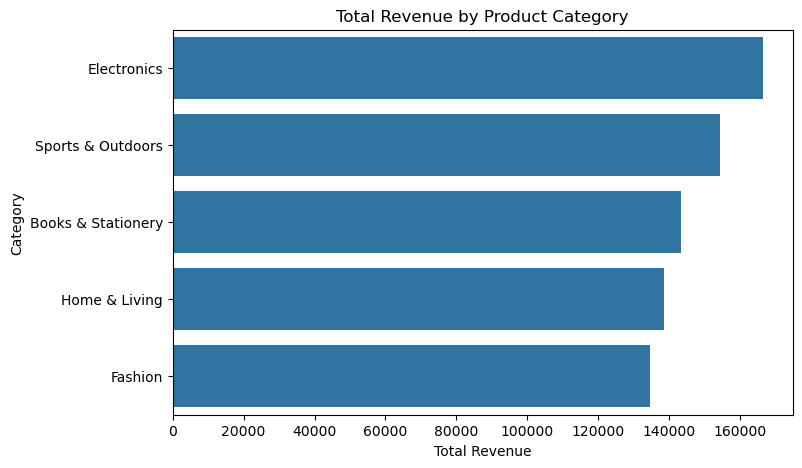

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=category_revenue.values,
    y=category_revenue.index
)
plt.title("Total Revenue by Product Category")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.show()


*The bar chart shows that Electronics contributes the highest revenue, while other categories show relatively balanced performance.*

**Visualization 2: Monthly Revenue Trend**

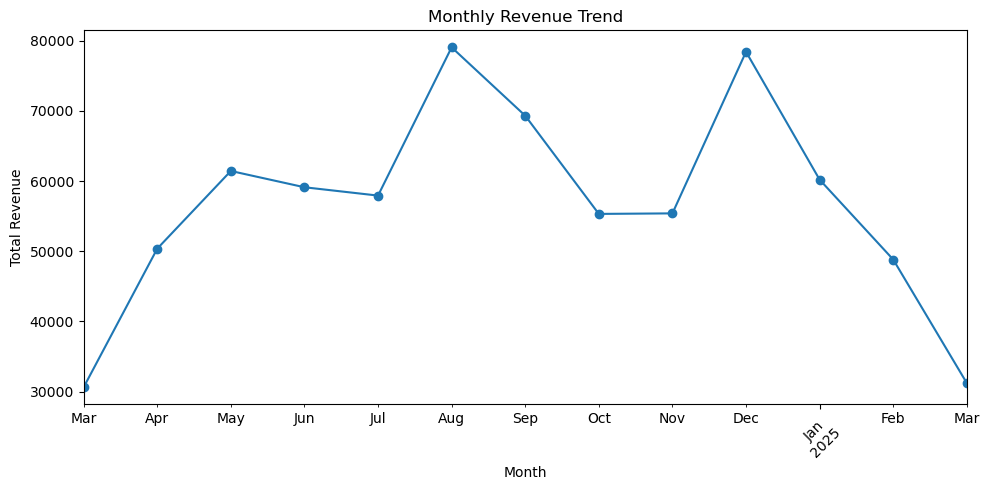

In [27]:
plt.figure(figsize=(10, 5))
monthly_revenue.plot(marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*This line graph shows that total revenue peaks during **August** and **December**, indicating seasonal increases in sales during these months.*

**Visualization 3: Quantity vs Revenue by Age Group**

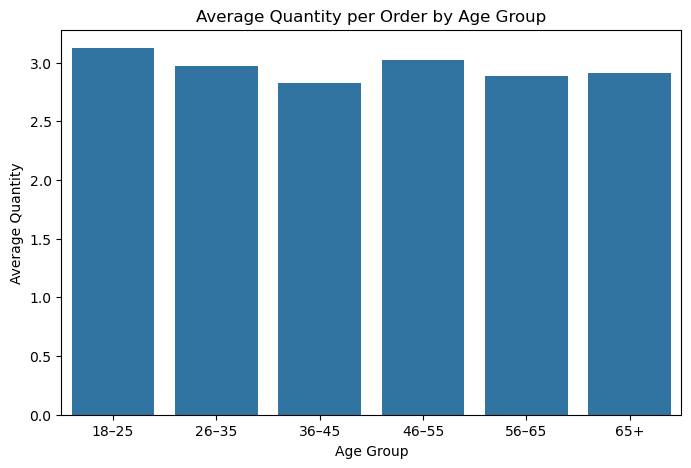

In [29]:
#Average Quantity by Age Group
plt.figure(figsize=(8, 5))
sns.barplot(
    x=age_group_quantity.index,
    y=age_group_quantity.values
)
plt.title("Average Quantity per Order by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Quantity")
plt.show()


*This bar graph shows that customers in the **18–25** age group purchase a higher average quantity of items per order compared to other age groups.*

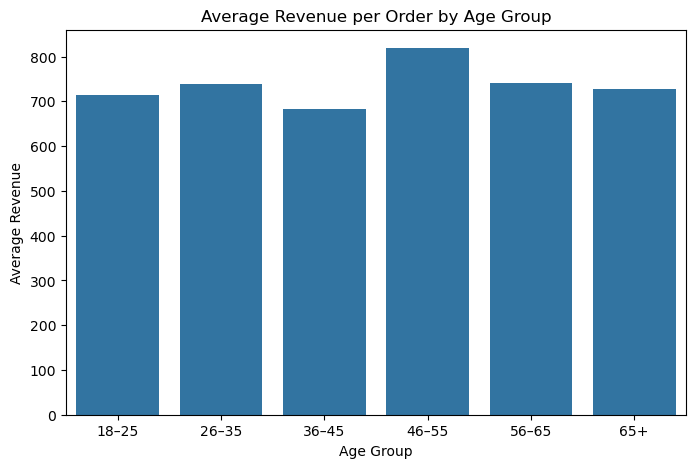

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=age_group_revenue.index,
    y=age_group_revenue.values
)
plt.title("Average Revenue per Order by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Revenue")
plt.show()


*This bar graph indicates that customers aged **46–55** generate the highest average revenue per order, suggesting stronger purchasing power in this age segment.*

**Visualization 4: Review Score by Category**

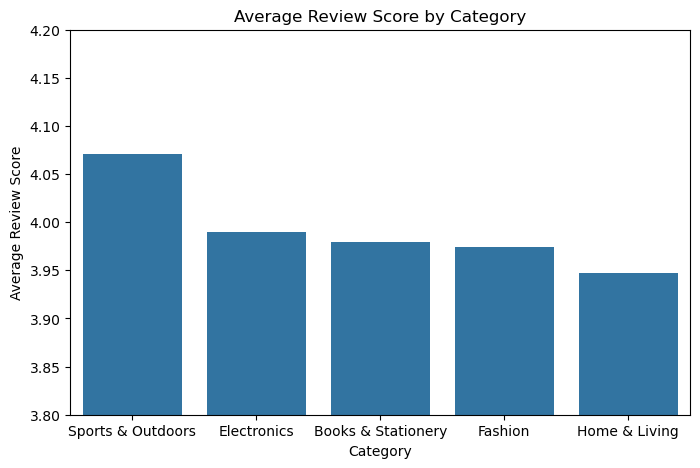

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=category_review.index,
    y=category_review.values
)
plt.title("Average Review Score by Category")
plt.xlabel("Category")
plt.ylabel("Average Review Score")
plt.ylim(3.8, 4.2)
plt.show()


*This bar graph shows that the **Sports & Outdoors** category has the highest average review score (above 4), indicating slightly stronger customer satisfaction.  
At the same time, review scores across other categories remain close to 4, suggesting a consistently positive customer experience across the product portfolio.*